In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

Прочитаем наши данные:

In [29]:
voice_data = pd.read_csv('../../data/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


проверим данные на наличие пропусков:

In [6]:
voice_data.isnull().sum().sum()
# 0

0

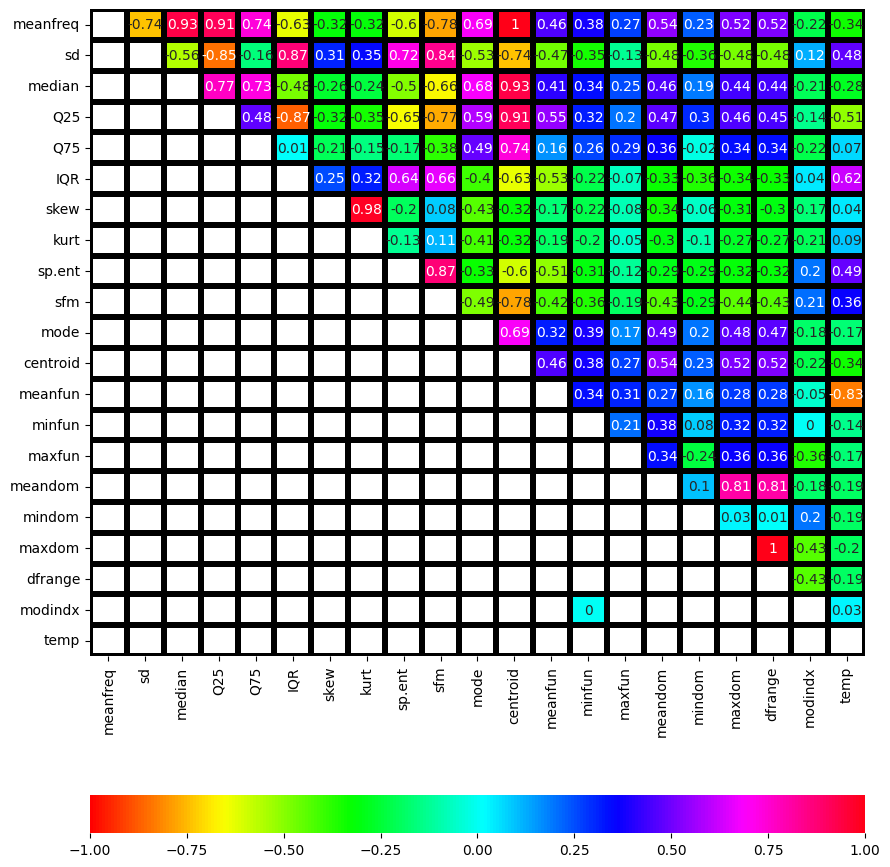

In [30]:
region = np.where((voice_data['label'] == 'male'), 1, 0)
 
voice_data.insert(loc = voice_data.shape[1], column= 'temp', value = region)

temp=voice_data.corr(numeric_only=True).round(2)
#  фильтор
filtr_1=np.tril(temp)

fig = plt.figure(figsize=(10, 12))
sns.heatmap(temp, # df
            annot=True, # вывод надписей (подписать фон)
            vmin=-1, vmax=1, center= 0,# граници тепловой шкалы
            cmap= 'hsv',    # палитра цветов  https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
            linewidths=3, linecolor='black', # толщина и цвет оконтовки ячеек
            cbar_kws= {'orientation': 'horizontal'},  # отображать цветовую шкалу горизонтально
            # cbar=False,  # убрать цветовую шкалу
            # square=True    # форма ячеек квадрат
            mask=filtr_1  # фильтор выводимых значений
            )# https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

voice_data=voice_data.drop('temp',axis=1)

In [32]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

Разделим датасет на две части в соотношении 80/20

In [33]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


### Задание 7.1
Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

accuracy на тестовой выборке = 0.956


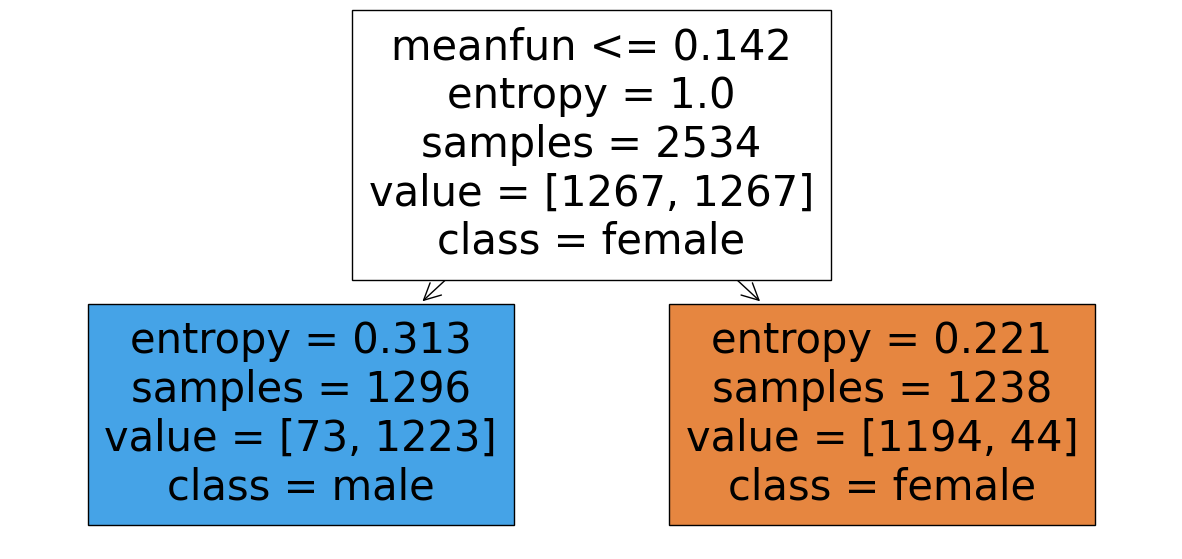

In [41]:
dt = tree.DecisionTreeClassifier(
    max_depth=1, 
    random_state=42,
    criterion='entropy', #критерий информативности
    
)
dt.fit(X_train, y_train)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['female', 'male'], 
    filled=True, 
    impurity=True
);

y_pred=dt.predict(X_test)
print('accuracy на тестовой выборке = {:.3f}'.format(metrics.accuracy_score(y_pred,y_test)))

### Задание 7.2
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

accuracy на тестовой выборке = 0.962


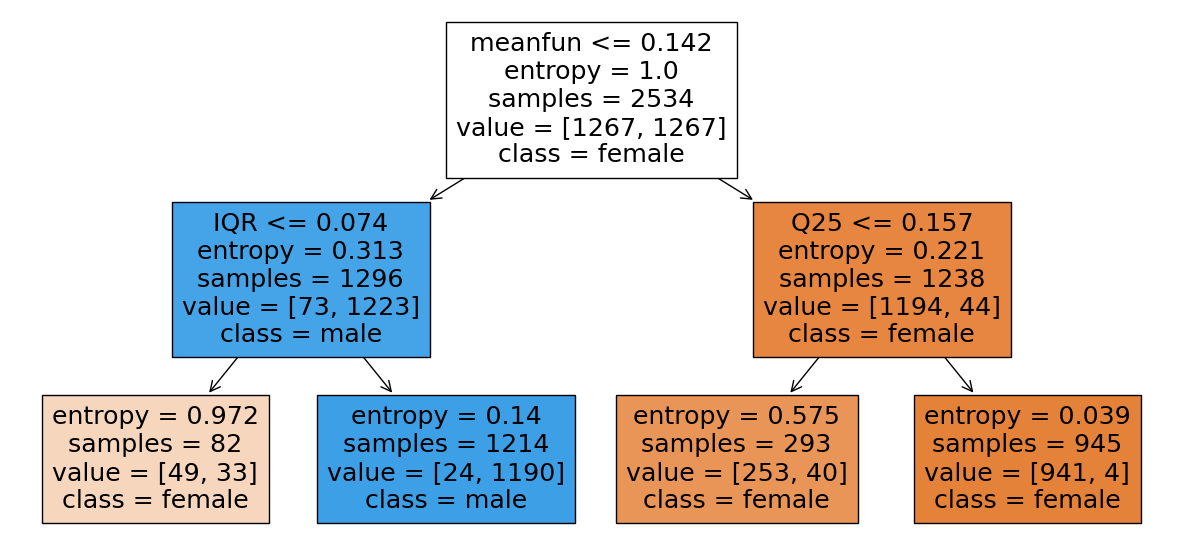

In [40]:
dt = tree.DecisionTreeClassifier(
    max_depth=2, 
    random_state=42,
    criterion='entropy', #критерий информативности
    
)
dt.fit(X_train, y_train)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['female', 'male'], 
    filled=True, 
    impurity=True
);

y_pred=dt.predict(X_test)
print('accuracy на тестовой выборке = {:.3f}'.format(metrics.accuracy_score(y_pred,y_test)))

### Задание 7.3
Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

In [43]:
dt = tree.DecisionTreeClassifier(
    # max_depth=2, 
    random_state=0,
    criterion='entropy', #критерий информативности
    
)
dt.fit(X_train, y_train)

print('глубина полученного дерева решения = {}'.format(dt.get_depth()))

print(' количество листьев в полученном дереве решений = {}'.format(dt.get_n_leaves()))

y_pred=dt.predict(X_train)
print('accuracy на тренировогной выборке = {:.3f}'.format(metrics.accuracy_score(y_pred,y_train)))

y_pred=dt.predict(X_test)
print('accuracy на тестовой выборке = {:.3f}'.format(metrics.accuracy_score(y_pred,y_test)))

глубина полученного дерева решения = 12
 количество листьев в полученном дереве решений = 54
accuracy на тренировогной выборке = 1.000
accuracy на тестовой выборке = 0.973


### Задание 7.4
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:

# Задаём сетку параметров
```python
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
```
В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (StratifiedKFold):

# Задаём метод кросс-валидации
```python
cv = model_selection.StratifiedKFold(n_splits=5)
```
С помощью Grid SearchCV из модуля model_selection библиотеки sklearn переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр random_state для дерева решений установите равным 0. В качестве метрики качества (параметр scoring) используйте accuracy.

In [46]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

grid_search_dt = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), 
    param_grid=param_grid, # словарь параметров для подбора
    cv=cv, # валидация на 5 выборок
    n_jobs = -1 # все ядра процессора
)  
%time grid_search_dt.fit(X_train, y_train) 
y_pred = grid_search_dt.predict(X_train) 

print("Наилучшие значения гиперпараметров: {} \n".format(grid_search_dt.best_params_)) 
score = metrics.accuracy_score(y_pred,y_train)
print('accuracy на тренировочной выборке: {:.3f} \n'.format(score))

y_pred = grid_search_dt.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print('accuracy на тестовой выборке: {:.3f}'.format(score))

CPU times: total: 780 ms
Wall time: 6.62 s
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3} 

accuracy на тренировочной выборке: 0.996 

accuracy на тестовой выборке: 0.970


Text(0.5, 1.0, 'столбчатую диаграмму коэффициентов значимости каждого из факторов')

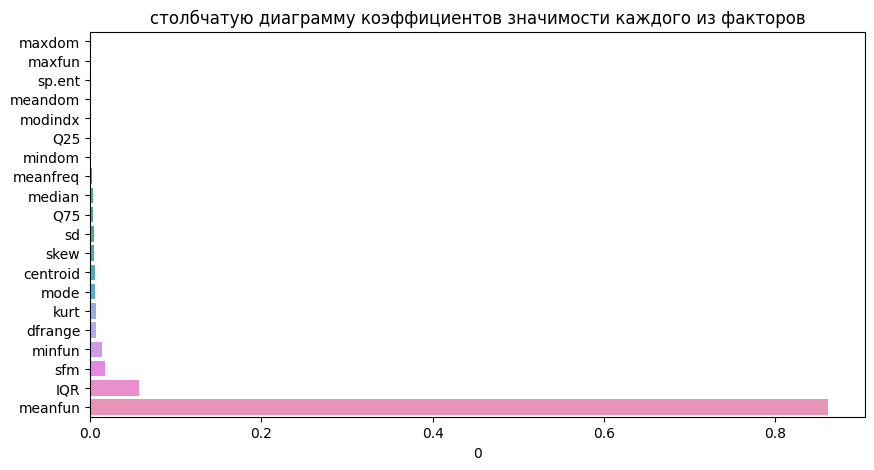

In [82]:
# dt = tree.DecisionTreeClassifier(
#     grid_search_dt.best_params_ ,
#     random_state=0,    
# )
# dt.fit(X_train, y_train)

temp=grid_search_dt.best_estimator_.feature_importances_
df=pd.DataFrame(temp, index=X.columns)
df=df[0].sort_values()

fig = plt.figure(figsize=(10, 5))
fig = sns.barplot(x=df,y=df.index)
# plt.xticks(rotation=45)
fig.set_title("столбчатую диаграмму коэффициентов значимости каждого из факторов")
# plt.show()
